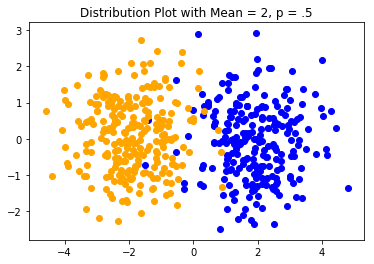

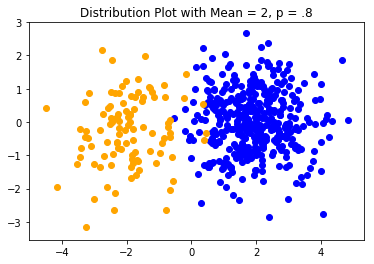

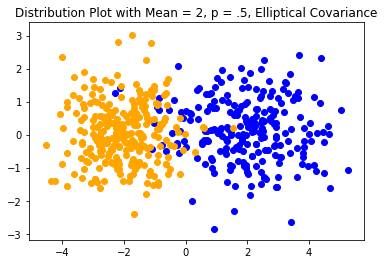

In [34]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

def get_multivariate_sample(n, d, mean, p = .5, spherical = True, truncated = False):
    cov_1 = np.identity(d)
    cov_2 = np.identity(d)
    if not spherical:
        diag = np.ones(d)
        diag[0] = 2
        cov_2 = np.diag(diag)
    x_sample = []
    y_sample = []
    means = np.zeros(d)
    means[0] = mean
    for i in range(n):
        y = np.random.binomial(1, p)
        if (y == 0):
            x = np.random.multivariate_normal(-means, cov_1)
        else:
            x = np.random.multivariate_normal(means, cov_2)
        x_sample.append(x.tolist())
        y_sample.append(y)
    return np.array(x_sample), np.array(y_sample)

def split_by_class(sample):
    y_one = [pair for pair in sample if pair[1] == 1]
    y_neg_one = [pair for pair in sample if pair[1] == 0]
    return y_one, y_neg_one

X, y = get_multivariate_sample(500, 2, 2)
sample = list(zip(X, y))
class_one, class_neg_one = split_by_class(sample)
plt.scatter([x[0] for x in list(zip(*class_one))[0]], [x[1] for x in list(zip(*class_one))[0]], c = 'b')
plt.scatter([x[0] for x in list(zip(*class_neg_one))[0]], [x[1] for x in list(zip(*class_neg_one))[0]], c = 'orange')
plt.title("Distribution Plot with Mean = 2, p = .5")
plt.show()

X, y = get_multivariate_sample(500, 2, 2, .8)
sample = list(zip(X, y))
class_one, class_neg_one = split_by_class(sample)
plt.scatter([x[0] for x in list(zip(*class_one))[0]], [x[1] for x in list(zip(*class_one))[0]], c = 'b')
plt.scatter([x[0] for x in list(zip(*class_neg_one))[0]], [x[1] for x in list(zip(*class_neg_one))[0]], c = 'orange')
plt.title("Distribution Plot with Mean = 2, p = .8")
plt.show()

X, y = get_multivariate_sample(500, 2, 2, .5, False)
sample = list(zip(X, y))
class_one, class_neg_one = split_by_class(sample)
plt.scatter([x[0] for x in list(zip(*class_one))[0]], [x[1] for x in list(zip(*class_one))[0]], c = 'b')
plt.scatter([x[0] for x in list(zip(*class_neg_one))[0]], [x[1] for x in list(zip(*class_neg_one))[0]], c = 'orange')
plt.title("Distribution Plot with Mean = 2, p = .5, Elliptical Covariance")
plt.show()


In [15]:
def three_class_multivariate(n, d, mean):
    mean_1 = np.zeros(d)
    mean_1[0] = mean
    mean_2 = np.zeros(d)
    mean_2[0] = -mean
    mean_3 = np.zeros(d)
    mean_3[1] = mean
    x_sample = []
    y_sample = []
    for i in range(n):
        y = np.random.binomial(2, .5)
        if y == 0:
            x = np.random.multivariate_normal(mean_1, np.identity(d))
        elif y == 1:
            x = np.random.multivariate_normal(mean_2, np.identity(d))
        else:
            x = np.random.multivariate_normal(mean_3, np.identity(d))
        x_sample.append(x.tolist())
        y_sample.append(y)
    return np.array(x_sample), np.array(y_sample)

def split_by_class_3(sample):
    y_one = [pair for pair in sample if pair[1] == 0]
    y_two = [pair for pair in sample if pair[1] == 1]
    y_three = [pair for pair in sample if pair[1] == 2]
    return y_one, y_two, y_three
    

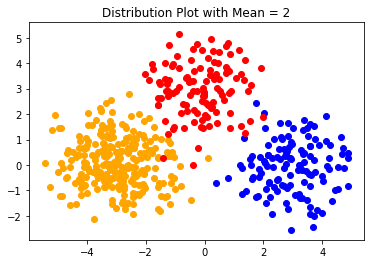

In [19]:
X, y = three_class_multivariate(500, 2, 3)
sample = list(zip(X, y))
class_one, class_two, class_three = split_by_class_3(sample)
plt.scatter([x[0] for x in list(zip(*class_one))[0]], [x[1] for x in list(zip(*class_one))[0]], c = 'b')
plt.scatter([x[0] for x in list(zip(*class_two))[0]], [x[1] for x in list(zip(*class_two))[0]], c = 'orange')
plt.scatter([x[0] for x in list(zip(*class_three))[0]], [x[1] for x in list(zip(*class_three))[0]], c = 'red')
plt.title("Distribution Plot with Mean = 2")
plt.show()